* PyTorch for Neural Network Classification
* Notebook by Adam Lang
* Date: 2/24/2025

# Overview
This notebook is based on the concepts taught in Daniel Bourke's PyTorch for Deep Learning Bootcamp on Udemy.

* Although I have been coding in PyTorch since 2022, I continually review and brush up on my torch skills and Daniel Bourke is the best in the business at teaching tips and tricks to make you a PyTorch guru.

* As the great Kobe Bryant once said:
```
Mamba Mentality means "to constantly try to be the best version of yourself. It's a constant quest to try to better today than you were yesterday."
“Why do you think I’m the best player in the world? Because I never ever get bored with the basics.”
```

# Archtecture of Classification Models in PyTorch
* Chart is from Daniel Bourke's Deep Learning Bootcamp, [source](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/02_pytorch_classification.pdf)

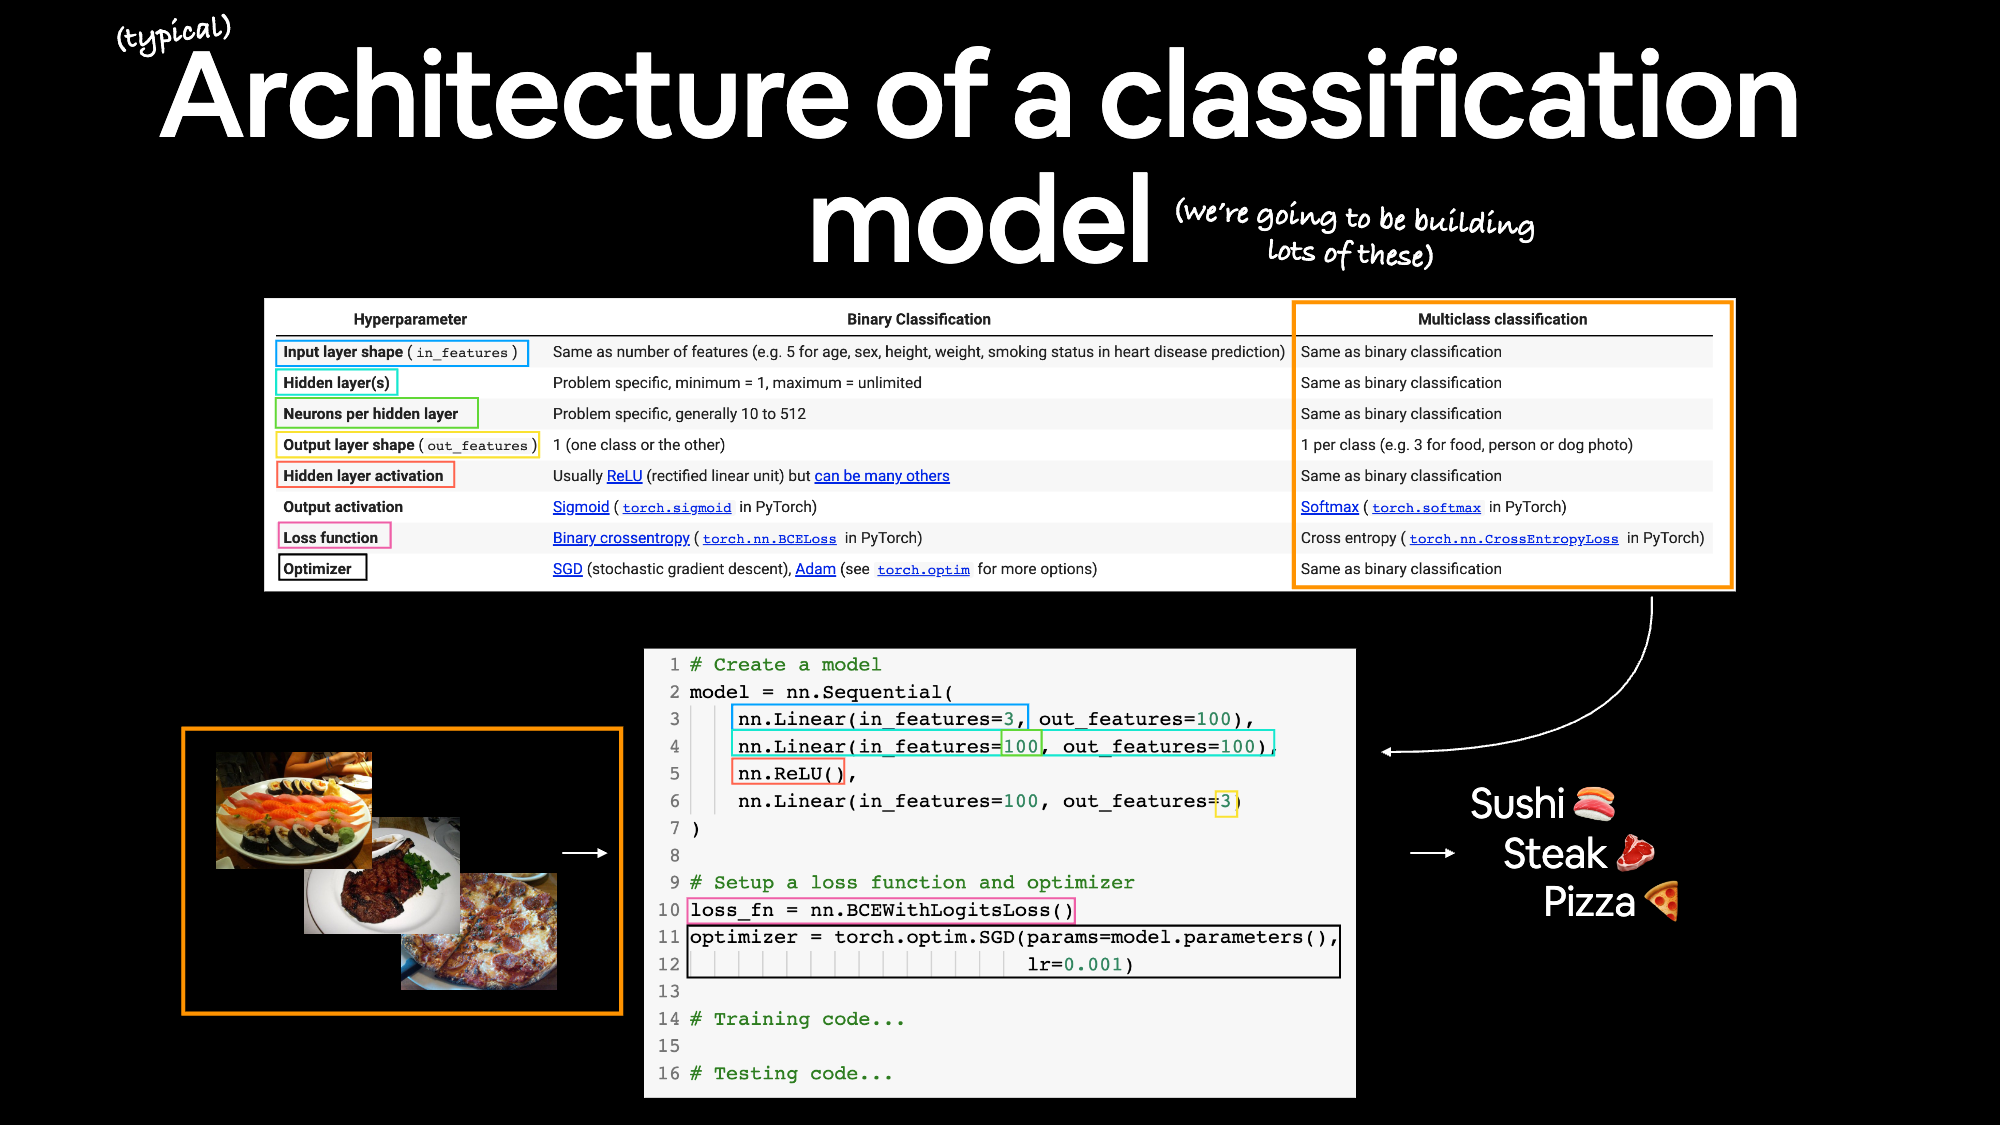

## Binary vs. Multiclass Classification
* We know there are similarities and differences between the two types of classification models in machine learning.
* What is the same for both?
  * Input layer shape
  * Hidden layers
  * Neurons per hidden layer
  * Hidden Layer activation
    * ReLU...or others...
  * Optimizer --> `torch.optim`
    * SGD (stochastic gradient descent)
    * Adam
    * AdamW

* What is different?
  * **Output layer shape**
    * 1 per class -- 2 for binary, and more than 2 for multiclass
  * **Output activation**
    * Sigmoid for binary
    * Softmax for multiclass

  * **Loss functions**
    * Binary Cross Entropy for binary (`torch.nn.BCELoss`)
    * Cross Entropy for multiclass (`torch.nn.CrossEntropyLoss`)

# Neural Network Classification with PyTorch
* Classification is the art and science of predicting 1 or multiple target classes from input data.

## 1. Data
* We will create synthetic data using sklearn.
* We will make a circular dataset to show how neural nets are good at classifying with non-linear data.

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles ## make circles dataset from sklearn

## make 1000 samples
n_samples = 1000

# create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
## len of X, y
len(X), len(y)

(1000, 1000)

Summary
* Dataset is perfectly balanced.

In [4]:
## first 5 samples of X and y
print(f"First 5 samples of X:\n\n {X[:5]}\n\n")
print(f"First 5 samples of y:\n\n {y[:5]}")

First 5 samples of X:

 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


First 5 samples of y:

 [1 1 1 1 0]


In [5]:
# Make a dataframe with pandas
import pandas as pd

## X1 and X2 are both columns o the tensor
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                       "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [6]:
## val counts
circles.label.value_counts()

,count
label,
1,500
0,500


Summary
* The dataset target labels are evenly balanced.

## 2. Visualize Data

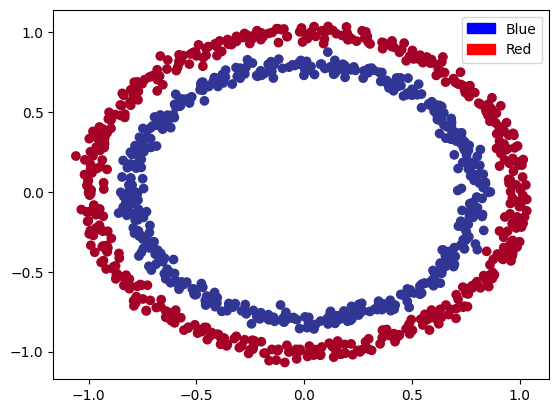

In [7]:
import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
%matplotlib inline

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

# Create proxy artists for the legend
red_patch = mpatches.Patch(color='red', label='Red')
blue_patch = mpatches.Patch(color='blue', label='Blue')

# Add legend using the proxy artists
plt.legend(handles=[blue_patch, red_patch], loc='upper right') # Pass patches to handles
plt.show();

Note: The data we are working with as often referred to as a "Toy dataset".
  * Small enough to experiment with but sizeable to utilize fundamental techniques.

## 3. Check input and output shapes
* This is important for tensor and matrices operations.

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [10]:
type(X)

numpy.ndarray

Summary
* As we can see we are working with numpy arrays, we need PyTorch tensors.

In [11]:
## view first example of features and labels
X_sample = X[0]
y_sample = y[0]


print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}\n")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1

Shapes for one sample of X: (2,) and the same for y: ()


## 4. Turn Data into Tensors & Create Train/Test Splits


In [12]:
import torch
## check version
print(f"Version of torch: {torch.__version__}")

Version of torch: 2.5.1+cu124


In [13]:
##check dtypes of X and y
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [14]:
## 1. Turn data into tensors --> need to convert `from_numpy()`
X = torch.from_numpy(X).type(torch.float) ## float32
y = torch.from_numpy(y).type(torch.float) ## float32


X[:5], y[:5]


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
## check dtypes
X.dtype, y.dtype

(torch.float32, torch.float32)

Summary
* We can see that we now have torch float32 dtypes instead of float64 which is the default dtype for numpy arrays.

In [16]:
## 2. Train/Test split for machine learning datsets
from sklearn.model_selection import train_test_split

## random train_test_split --> torch.manual_seed won't work because we are using sklearn train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, ## 20% test and 80% train
                                                    random_state=42)

In [17]:
## check len of X and y train sets
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [18]:
n_samples

1000

## 5. Building a Model

* Let's build a model to classify our blue and red dots.

* To do so we need to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if one is available.

2. Build a model -- by subclassing `nn.Module` from PyTorch.

3. Define loss function & optimizer.

4. Create Train & Test loops.

5. Evaluate the model.

### 1. Setup Device Agnostic Code

In [19]:
## import torch and nn
import torch
from torch import nn

## 1. device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 2. Build a Model
* These are the steps we will follow:

1. Subclassing `nn.Module` (almost all PyTorch models do this)

2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data (especially if non-linear which our data is)

3. Defines a `forward()` method that outlines the forward pass or forward computations of the model.

4. Instantiate an instance of our model class and send it to the target device.

In [20]:
## layer needs to match this-->
X_train.shape

torch.Size([800, 2])

In [21]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

We want to match 1 sample of X to 1 sample of y

Rule:
  * More hidden layers there are, the more opportunities the model has to learn patterns.
  * `out_features` is the hidden layers

In [22]:
## 1. Construct model that subclasses nn.Module()
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers --> handle data shapes
    self.layer_1 = nn.Linear(in_features=2, out_features=5) ## takes in 2 features --> upscales to 5 features --> arbitrary -- usually multiples of 8
    self.layer_2 = nn.Linear(in_features=5, out_features=1) ## takes in 5 features from previous layer and outputs single feature (same shape as y)

    # ## 2. using nn.Sequential()
    # self.two_linear_layers = nn.Sequential(
    #     nn.Linear(in_features=2, out_features=5),
    #     nn.Linear(in_features=5, out_features=1)
    # )

  ## 3. Define forward method for the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) ## x --> layer_1 output --> layer_2 --> output

    # return two_linear_layers(x) ## if using `nn.Sequential()`

# 4. init model_class and send to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
device

'cuda'

In [24]:
next(model_0.parameters()).device

device(type='cuda', index=0)

Summary
* Models params are now on target device

### TensorFlow Playground visualization
* This is a great [visualization tool](https://playground.tensorflow.org/#activation=linear&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5&seed=0.87152&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) when building neural networks!

This is the model we just built but visualized in the TensorFlow playground:

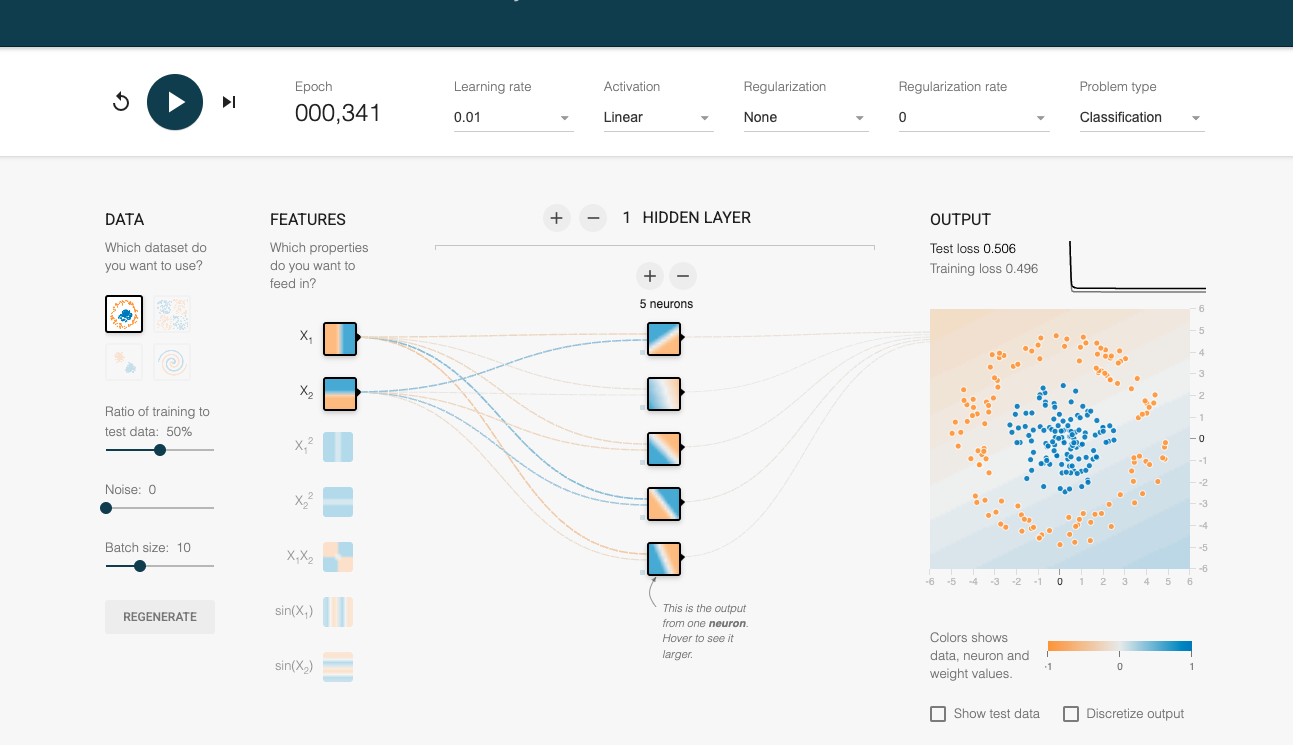

### `nn.Sequential()`
* This is an out of the box "simple" way to build a neural network instead of using the method above.
* https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html
* Creating your own class is a more customized way to do this.

In [25]:
# Let's replicate the model above using `nn.Sequential()`
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5), ## this can be anything usually multiple of 8 (e.g. 128)
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
## lets see state_dict()
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4426,  0.2797],
                      [ 0.5168, -0.5666],
                      [-0.2313, -0.3204],
                      [ 0.7028, -0.1943],
                      [-0.7005, -0.1317]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0050,  0.3973,  0.2191,  0.2630, -0.1394], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1479, -0.3775, -0.2090,  0.2017, -0.4431]], device='cuda:0')),
             ('1.bias', tensor([0.3132], device='cuda:0'))])

Summary
* If we had 128 out_features (hidden layer) it would be 128 x 2 = 256
* However, we have 2 x 5 = 10
```
2 inputs x 5 outputs = 10
```

In [27]:
## now make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device)) ## send test data to device
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[0.],
        [1.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [-0.],
        [1.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [28]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### Setup loss function and optimizer

Which loss function or optimizer should we use?

This is problem specific....

1. **Regression**
  * For Regression we are predicting numbers, so you would want MAE (mean absolute error) or MSE (mean squared error).

2. **Classification**
  * For classification you would want binary cross entropy or categorical cross entropy (cross entropy).

As a reminder, the loss function measures how wrong the model's predictions are!

This table is a resource from Daniel Bourke:

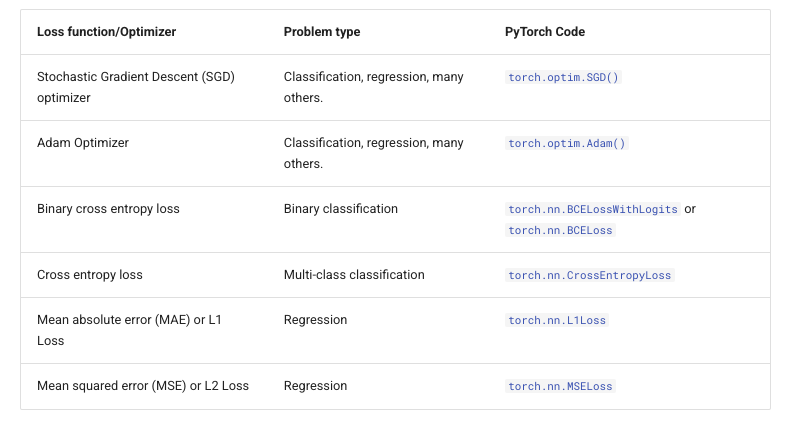

### Wait what the hell is a logit?!
* Logits are the raw output values from the last layer of a neural network that have not yet been normalized into probabilities.
  * These raw scores are crucial as they encapsulate the model's initial predictions. * For example, in a neural network designed for image classification, the logits represent the unprocessed scores for each possible class before they are converted into probabilities.

* Logits are converted into probabilities by passing them through activation functions such as the **softmax function.**
  * This transformation is essential for making the outputs of machine learning models interpretable and actionable.
  * The softmax function maps the logits from the range of (-\infty) to (+\infty) to a range of 0 to 1, ensuring that the output values sum up to 1 and can be interpreted as probabilities.
* Great post by weights and biases on logits: https://wandb.ai/amanarora/Written-Reports/reports/Understanding-Logits-Sigmoid-Softmax-and-Cross-Entropy-Loss-in-Deep-Learning--Vmlldzo0NDMzNTU3

### Optimizers
* The 2 most common are:
1. SGD
2. Adam

* Torch has multiple optimizers available for use, full list here: https://pytorch.org/docs/stable/optim.html

* For the loss function we are going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy (BCE) is check out this article: https://medium.com/towards-data-science/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

We will use the Sigmoid:

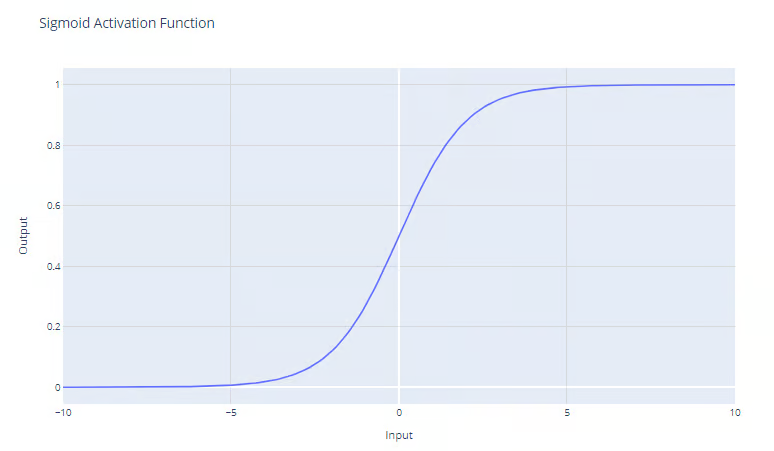

Source above: https://www.datacamp.com/tutorial/introduction-to-activation-functions-in-neural-networks

We want this:
1. loss function
2. optimizer
3. evaluation metric (e.g. accuracy)

In [29]:
## setup loss function
# loss_fn = nn.BCELoss() #BCELoss = requires inputs to have gone through sigmoid activation func prior to input to BCELoss

## this below is similar to `nn.BCEWithLogitsLoss()`
nn.Sequential(
    nn.Sigmoid(),
    nn.BCELoss(),
)
## 1. loss function -- We can just use this alone
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function built in!

## 2. optimizer -- optimize model parameters!
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [30]:
## 3. Evaluation metric -- calculate accuracy
## accuracy -- out of 100 examples what percent did the model get right?
def accuracy_fn(y_true, y_pred):
  """Compares true vs. predictions"""
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## Train a Model
* To train a model you need to build a PyTorch training loop with the following steps:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backprop)
5. Optimizer (gradient descent)

### Going from raw logits --> prediction probabilities --> prediction labels
* The model outputs will be raw **logits**.

* We can convert these **logits** into prediction probabilities by passing them to some kind of activation function such as:
  * sigmoid for binary classification ...and
  * softmax for multiclass classification

* Then we can convert our models prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [31]:
# view first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5] ## pass X_test to model and put on device
y_logits

tensor([[ 0.3255],
        [ 0.5650],
        [-0.1365],
        [ 0.4557],
        [ 0.1268]], device='cuda:0')

In [32]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [33]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

#### Binary Classification - Sigmoid activation

In [34]:
# use the sigmoid activation function on our model logits
## to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5807],
        [0.6376],
        [0.4659],
        [0.6120],
        [0.5317]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* These are the most common decision boundaries:
  * `y_pred_probs` >= 0.5, `y=1` (class 1)
  * `y_pred_probs` < 0.5, `y=0` (class 0)

In [35]:
## find the predicted labels
y_preds = torch.round(y_pred_probs)

# in full (logits --> pred probs --> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 0., 1., 1.], device='cuda:0')

In [36]:
## torch.eq --> equality
torch.eq(torch.tensor([1,1]), torch.tensor([1,1]))

tensor([True, True])

In [37]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building a Train and Test Loop

In [38]:
device

'cuda'

In [39]:
!nvidia-smi

Tue Mar 11 13:06:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   49C    P0             27W /   70W |     150MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [40]:
loss_fn

BCEWithLogitsLoss()

In [41]:
loss_fn_without_logits = nn.BCELoss()
loss_fn_without_logits

BCELoss()

Summary
* Notice the difference above in the loss functions and what each expects as input.
* `BCEWithLogitsLoss()` expects raw logits
* `BCELoss()` expects prediction probabilities

Therefore it is important to pay attention to what loss function you are using.

In [42]:
## set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42) ## another approach

## set num of epochs
epochs=100

### Set device for model and data
model_0.to(device)
## put data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  ## 1. Forward pass -- 2 steps needed here as out model outputs raw logits
  ## first --> pass raw logits to model + squeeze
  ## second --> get y_pred --> round(sigmoid(logits))
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits --> pred probs --> pred labels

  ## 2. Calculate loss/accuracy -- pass y_logits NOT y_pred (BCEWithLogitsLoss expects logits as input)
  ### loss_fn expects
  # loss = loss_fn(torch.sigmoid(y_logits, # nn.BCELoss() expects prediction probabilities as input
  #                              y_train))
  loss = loss_fn(y_logits, ## nn.BCEWithLogitsLoss() expects raw logits as inputs
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  ## 3. Optimize zero grad -- zero out the gradients
  optimizer.zero_grad()

  ## 4. Loss backward -- backpropagation
  loss.backward()

  ## 5. Optimizer step -- gradient descent (reduce gradients)
  optimizer.step()


  ### Testing loop
  model_0.eval()
  with torch.inference_mode():
    ## 1. Forward pass -- similar to above we need to start with raw logits --> pred probs --> pred labels
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) ## sigmoid scaling of logits

    ## 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred) ## similar to sklearn metrics true --> pred

    ## Print out what's happenin' -- every 10 epochs
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.70933 | Acc: 53.87% | Test loss: 0.72474 | Test acc: 48.00%
Epoch: 10 | Loss: 0.70319 | Acc: 52.62% | Test loss: 0.71714 | Test acc: 46.50%
Epoch: 20 | Loss: 0.70011 | Acc: 52.50% | Test loss: 0.71277 | Test acc: 47.00%
Epoch: 30 | Loss: 0.69839 | Acc: 52.38% | Test loss: 0.70994 | Test acc: 46.00%
Epoch: 40 | Loss: 0.69730 | Acc: 52.25% | Test loss: 0.70792 | Test acc: 45.50%
Epoch: 50 | Loss: 0.69654 | Acc: 52.25% | Test loss: 0.70637 | Test acc: 46.00%
Epoch: 60 | Loss: 0.69598 | Acc: 51.62% | Test loss: 0.70513 | Test acc: 46.00%
Epoch: 70 | Loss: 0.69554 | Acc: 51.38% | Test loss: 0.70410 | Test acc: 46.00%
Epoch: 80 | Loss: 0.69519 | Acc: 51.12% | Test loss: 0.70323 | Test acc: 46.50%
Epoch: 90 | Loss: 0.69490 | Acc: 51.00% | Test loss: 0.70249 | Test acc: 46.50%


## Visualize Predictions
* From the metrics above it looks like the model isn't learning anything so what can we do?

* We will make some predictions on the model and then visualize them. In other words the Data Scientist's motto: **Visualize, Visualize, Visualize!**
  * This is a best practice after running a model and evaluating the outputs before jumping to any foregone conclusions or changing any hyperparameters.

* To do so, we are going to import a function called `plot_decision_boundary()`.
  * Daniel Bourke has an excellent repo that he has kindly shared with us with helper functions in PyTorch, see [here](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py)

In [43]:
import requests
from pathlib import Path

## download helper funcs from Pytorch Repo if not already downloaded
## 1. Check if .py file is downloaded already
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  ## 2. request raw url
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  ## 3. open file
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

## call the functions and download them
from helper_functions import plot_predictions, plot_decision_boundary

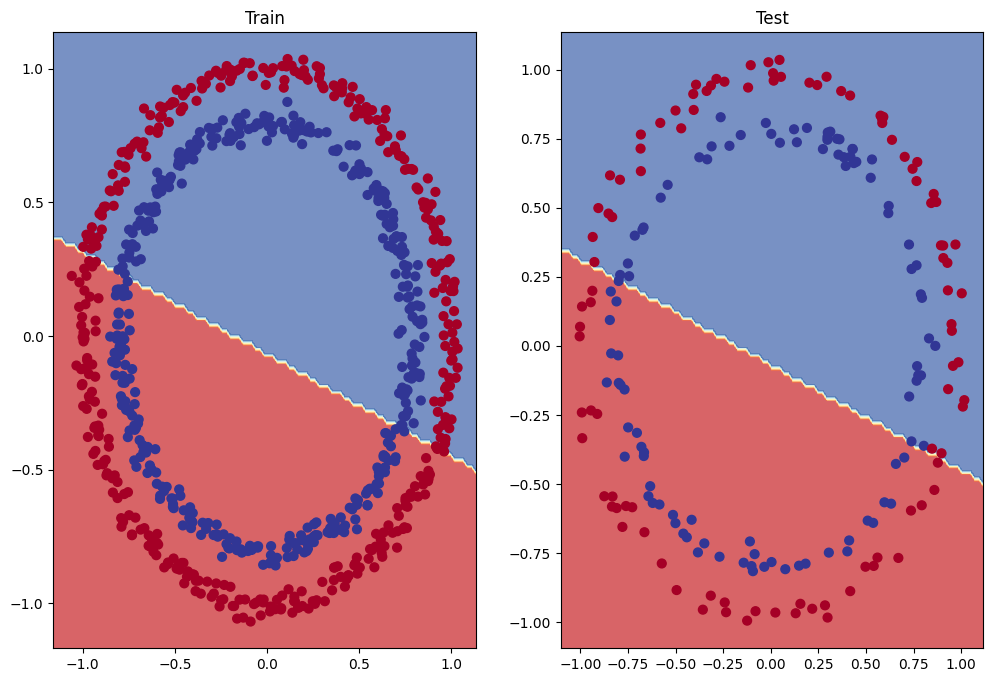

In [44]:
## plot decision boundary of Train data
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Train")
## call plot decision boundary function on train data
plot_decision_boundary(model_0, X_train, y_train)


## plot decision boundary of Test data
plt.subplot(1, 2, 2)
plt.title("Test")
## call plot decision boundary function on test data
plot_decision_boundary(model_0, X_test, y_test)

## Improving a Model (from a model perspective)
1. Add more layers
  * give the model more chances to learn about patterns in the data.

2. Add MORE hidden units/layers
  * go from 5 hidden units to 10 hidden units.

3. Fit for longer
  * give the model more of a chance to learn.

4. Changing the activation functions

5. Change the learning rate
  * if **too small** the model may not learn anything --> vanishing gradients.
    * "vanishing gradients" occur when the gradients become extremely small, hindering the network's ability to learn effectively by making weight updates too tiny.
  * if **too big** the gradient updates might be too frequent --> exploding gradients
    * "exploding gradients" refers to a situation where the gradients used to update a neural network's weights become excessively large during backpropagation, causing instability in training.

6. Change the loss function



This is a good review of Daniel Bourke's methods above:

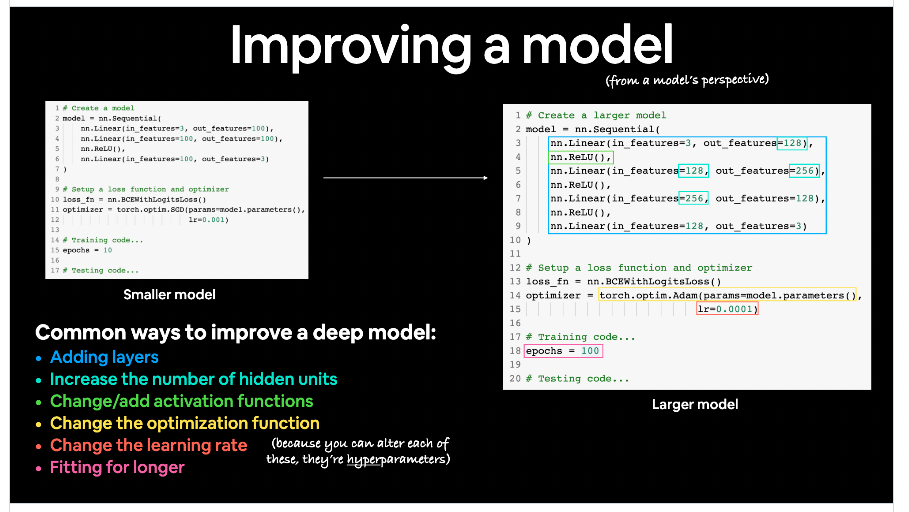

**Summary**
* What we see above is all of the aforementioned methods to improve a model, but there is a new thing mentioned: **non-linearity**.
* **We can see this with the `nn.ReLU()` function above.**
* If the input to a ReLU function is **positive**, the output is the same as the **input**.
  * **input positive --> output same**
* If the input is **negative**, the output is **zero**.
  * **input negative --> output is zero**


**Summary 2**
* We can see that all of those are ways to improve a model from the model's perspective.
* There is another way to improve a model via the **data perspective**.
* Because all of these values we as machine learning engineers and data scientists can change they are referred to as hyperparameters.

## Hyperparameter Tuning the model
* Lets try and improve the model by adding more hidden units: 5 ---> 10
* Increase the number of layers: 2 ---> 3
* Increase number of epochs: 100 ---> 1000

The problem with changing ALL 3 at the same time is that we don't know which hyperparameter is the issue.
  * Generally speaking we should always consider experiment tracking (e.g. Tensorboard, Weights & Biases, MLFlow, etc.)
  * This is how we can compare/contrast various hyperparameters.

In [45]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [46]:
## build a new model
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    ## increase layers from 2 --> 3
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features= 10, out_features=1)

  ## forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.layer_2(self.layer_1(x))) ## this method leverages speed ups where possible behind the scenes

    # ## method 2 -- reassignments
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    # return z

## create instance of model_1 --> send to device
model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

Summary
* Now we have a 3 layered model with additional hidden units.

### Loss Function and Optimizer

In [47]:
## 1. Create loss function
loss_fn = nn.BCEWithLogitsLoss()


## 2. Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

### Train and Test Loop
* Now we write the train and test loop.

In [48]:
## writing the train and test loops

## set manual_seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## epochs -- increase from 100 --> 1000
epochs=1000

## send data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

## Train loop
for epoch in range(epochs):
  ### Training
  model_1.train()
  # 1. Forward pass -- 2 steps: logits --> y_pred
  y_logits = model_1(X_train).squeeze() ## squeeze 2 dim tensor --> 1 dim tensor
  y_pred = torch.round(torch.sigmoid(y_logits)) ## logits --> pred probs --> prediction labels

  # 2. Calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step --> gradient descent
  optimizer.step()

  ### Testing loop
  model_1.eval() ## eval mode
  with torch.inference_mode(): ## inference_mode
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze() ## 2 dim --> 1 dim
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # 3. print out whats happenin'
    if epoch % 100 == 0:
      print(f"Epoch {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}")




Epoch 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test acc: 51.00
Epoch 100 | Loss: 0.69369 | Acc: 50.25% | Test Loss: 0.69269 | Test acc: 50.00
Epoch 200 | Loss: 0.69351 | Acc: 50.12% | Test Loss: 0.69282 | Test acc: 49.50
Epoch 300 | Loss: 0.69339 | Acc: 50.50% | Test Loss: 0.69295 | Test acc: 49.00
Epoch 400 | Loss: 0.69329 | Acc: 50.38% | Test Loss: 0.69309 | Test acc: 48.50
Epoch 500 | Loss: 0.69322 | Acc: 49.88% | Test Loss: 0.69322 | Test acc: 49.50
Epoch 600 | Loss: 0.69317 | Acc: 49.50% | Test Loss: 0.69335 | Test acc: 53.00
Epoch 700 | Loss: 0.69313 | Acc: 49.38% | Test Loss: 0.69347 | Test acc: 50.50
Epoch 800 | Loss: 0.69309 | Acc: 50.00% | Test Loss: 0.69358 | Test acc: 51.00
Epoch 900 | Loss: 0.69307 | Acc: 50.62% | Test Loss: 0.69368 | Test acc: 47.50


### Plot decision boundary

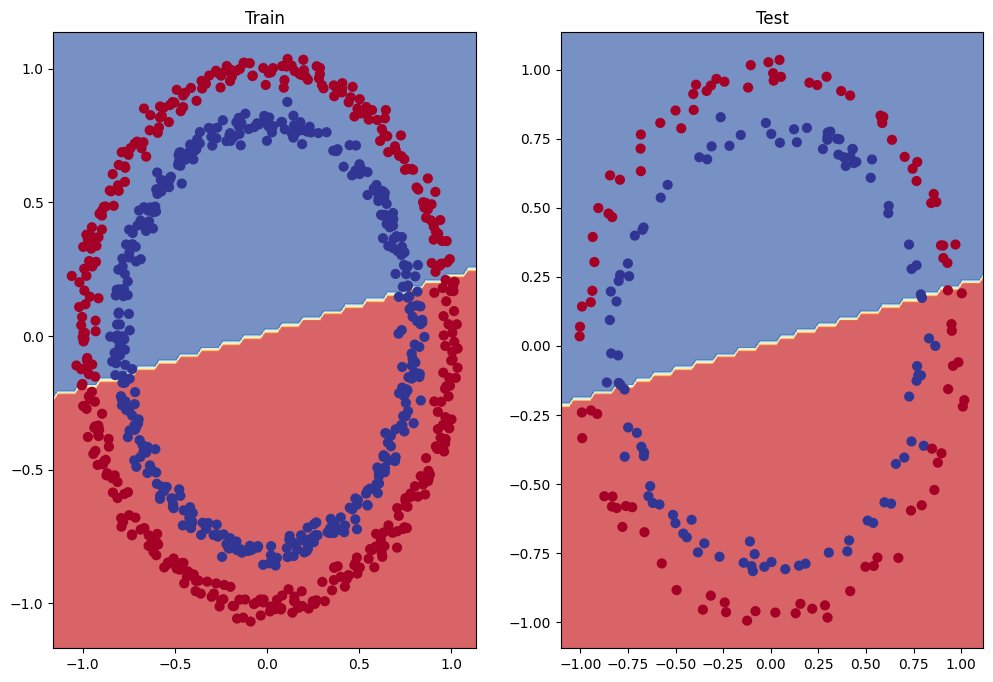

In [49]:
# plot decision boundary
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

## plot test
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Summary
* The model is trying to draw a straight line decision boundary for non-linear data....hmm thats a problem!
* So how can we get a decision boundary for non-linear data?

## Preparing Data to see if the model can fit a straight line
* One method to troubleshoot a larger problem in machine learning is to test out a smaller problem.
* We will replicate a straight line to see if the data can fit it.

In [50]:
# create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula (without epsilon)

# check the data
print(f"Len of X_regression: {len(X_regression)}\n")
X_regression[:5], y_regression[:5]

Len of X_regression: 100



(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [51]:
## create train/test splits
train_split = int(0.8*len(X_regression))

## train data
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]

## test data
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

## check lengths
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

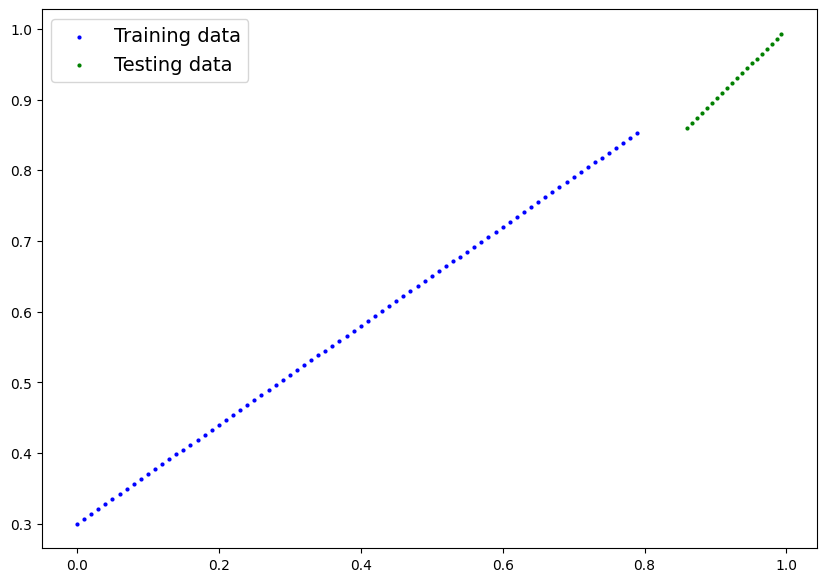

In [52]:
## plot data using plot_predictions function
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=y_test_regression,
                 test_labels=y_test_regression)

## Adjusting `model_` to fit a straight line

In [53]:
X_train_regression[:10].ndim, y_train_regression[:10].ndim

(2, 2)

Question
* Do we need to change the in_features and/or out_features?

In [54]:
## 1. Build model -- same architecture as model_1 but using pytorch --> nn.Sequential()
## internal forward method is built-in
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [55]:
## 2. Loss and optimizer

## loss --> L1Loss for regression model
loss_fn = nn.L1Loss() ## MAE loss with regression data

## optimizer
optimizer = torch.optim.AdamW(params=model_2.parameters(),
                            lr=0.01)

In [56]:
## 3. Train and Test loop

## set manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## set number of epochs
epochs = 1000

## Put data on target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

## Trainining loop
for epoch in range(epochs):
  ## model in train model
  model_2.train()

  ## 1. Forward pass
  y_pred = model_2(X_train_regression)

  ## 2. Calculate loss
  loss = loss_fn(y_pred, y_train_regression)

  ## 3. Optimizer zero grad --> zero out gradients
  optimizer.zero_grad()

  ## 4. loss backward --> backpropagation
  loss.backward()

  ## 5. Optimizer step --> gradient descent
  optimizer.step()

  ## Test loop
  # 1. set model to eval mode
  model_2.eval()
  with torch.inference_mode():
    # 2. Forward pass
    test_pred = model_2(X_test_regression)

    # 3. Calculate loss
    test_loss = loss_fn(test_pred, y_test_regression)

  # print out whats happenin
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test_Loss: 0.77619
Epoch: 100 | Loss: 0.00143 | Test_Loss: 0.00270
Epoch: 200 | Loss: 0.00839 | Test_Loss: 0.00909
Epoch: 300 | Loss: 0.01223 | Test_Loss: 0.01092
Epoch: 400 | Loss: 0.00394 | Test_Loss: 0.00276
Epoch: 500 | Loss: 0.00178 | Test_Loss: 0.01739
Epoch: 600 | Loss: 0.00334 | Test_Loss: 0.00209
Epoch: 700 | Loss: 0.00220 | Test_Loss: 0.01055
Epoch: 800 | Loss: 0.00980 | Test_Loss: 0.00730
Epoch: 900 | Loss: 0.01011 | Test_Loss: 0.00575


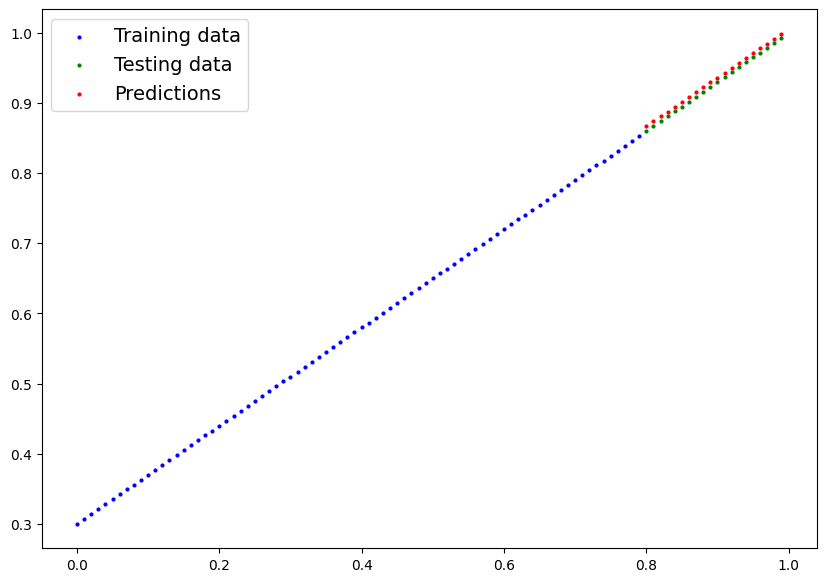

In [57]:
## Turn on evaluation mode and make predictions/inference
model_2.eval()

## make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression) ## X_test

## plot data and predictions -- plot_preds func uses numpy not pytorch
## for numpy move data to cpu
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## Missing piece: non-linearity!

* What patterns could you draw if you were given an infinite amount of straight and non-straight lines?

* In machine learning terms, an infinite (but really it is infinite) of liner and non-linear functions?

### Recreating non-linear data (red and blue circles)

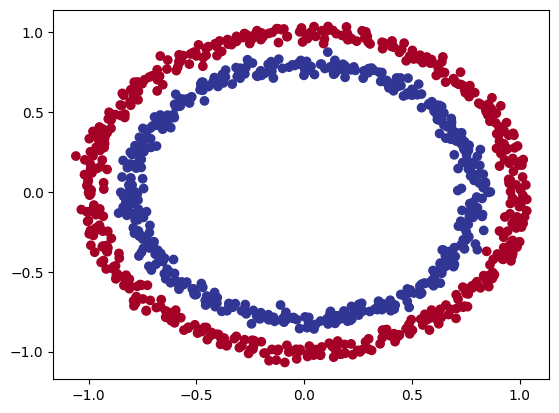

In [58]:
## make and plot data
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

n_samples=1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

## binary classification
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [59]:
## convert data to tensors --> then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# turn data into tensors -- turn into float make_circles uses numpy
## `from_numpy` as sklearn uses numpy
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test data
X_Train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.]))

### Building a model with non-linearity
* Linear = straight lines
* Non-linear = non-straight lines

In [60]:
## this is the number of inputs to the neural network
X.ndim

2

In [61]:
## build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() ## non-linear activation function
    # we can apply sigmoid function to logits

  # forward method
  def forward(self, x):
    ## relu functions in between --> pass outputs to sigmoid function
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

## model_3
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

Summary
* The ReLU function looks like this:

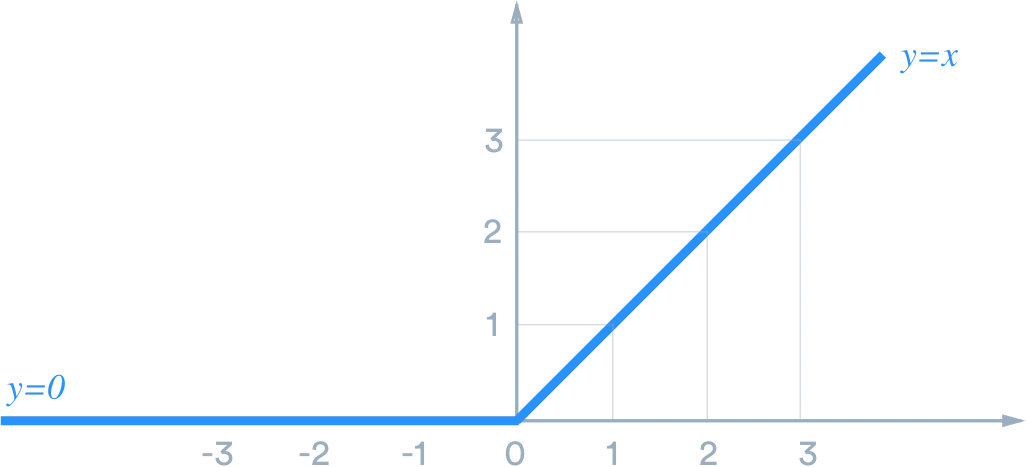

* ReLU is linear (identity) for all positive values, and zero for all negative values.
* Great blog post about this: https://medium.com/@danqing/a-practical-guide-to-relu-b83ca804f1f7

In [62]:
# setup loss and optimizer

## loss function
loss_fn = nn.BCEWithLogitsLoss() ## binary classification

## optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### Training a model with non-linearity

In [63]:
len(X_test), len(y_test)

(200, 200)

In [64]:
## set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs=1000

for epoch in range(epochs):
  ## training mode
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) ## logits --> pred probs --> pred labels

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred) ## same style as sklearn

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backprop)
  loss.backward()

  # 5. Step the optimizer (gradient descent)
  optimizer.step()

  ### Testing loop
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #print(test_logits.shape, y_test.shape)

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Accuracy: {acc:.2f} | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}")



Epoch: 0 | Loss: 0.6929 | Accuracy: 50.00 | Test Loss: 0.6932 | Test Acc: 50.00
Epoch: 100 | Loss: 0.6912 | Accuracy: 52.88 | Test Loss: 0.6910 | Test Acc: 52.50
Epoch: 200 | Loss: 0.6898 | Accuracy: 53.37 | Test Loss: 0.6894 | Test Acc: 55.00
Epoch: 300 | Loss: 0.6879 | Accuracy: 53.00 | Test Loss: 0.6872 | Test Acc: 56.00
Epoch: 400 | Loss: 0.6852 | Accuracy: 52.75 | Test Loss: 0.6841 | Test Acc: 56.50
Epoch: 500 | Loss: 0.6810 | Accuracy: 52.75 | Test Loss: 0.6794 | Test Acc: 56.50
Epoch: 600 | Loss: 0.6751 | Accuracy: 54.50 | Test Loss: 0.6729 | Test Acc: 56.00
Epoch: 700 | Loss: 0.6666 | Accuracy: 58.38 | Test Loss: 0.6632 | Test Acc: 59.00
Epoch: 800 | Loss: 0.6516 | Accuracy: 64.00 | Test Loss: 0.6476 | Test Acc: 67.50
Epoch: 900 | Loss: 0.6236 | Accuracy: 74.00 | Test Loss: 0.6215 | Test Acc: 79.00


### Evaluate model trained with non-linear activation functions

In [65]:
## make predictions on test set
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()


## print first 10 predictions
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

Summary
* We can see the predictions vs. actual are actually the same.

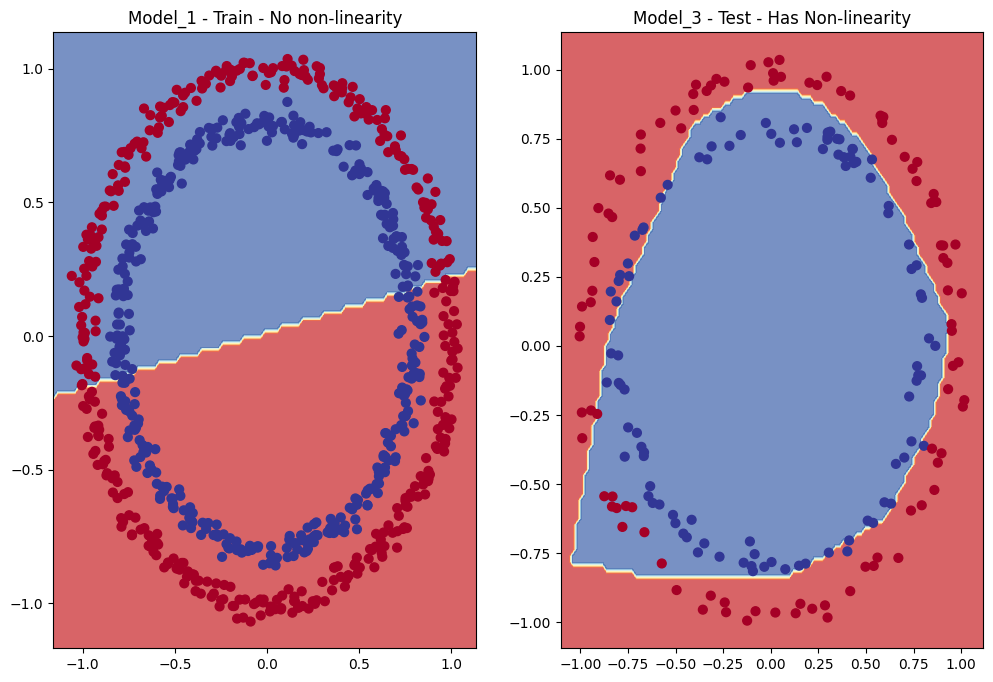

In [66]:
## plot decision boundaries
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.title("Model_1 - Train - No non-linearity")
## plot function
plot_decision_boundary(model_1, X_train, y_train)

## plot test data
plt.subplot(1,2, 2)
plt.title("Model_3 - Test - Has Non-linearity")
plot_decision_boundary(model_3, X_test, y_test)

#### Reminder of how to improve model on test set?
1. Add more layers
2. Add more hidden units
3. Fit for longer
4. Change activation functions
5. Change learning rate
6. Change loss function

## Replicating non-linear activation functions

* Neural networks rather than telling the model what to learn, we give it the tools to discover patterns in the data and it tries to figure out the patterns on its own.

* These tools are simply:
1. Linear functions
2. Non-linear functions

In [67]:
# Create a tensor
A = torch.arange(-10, 10, 1,
                 dtype=torch.float32)
A.dtype

torch.float32

In [68]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

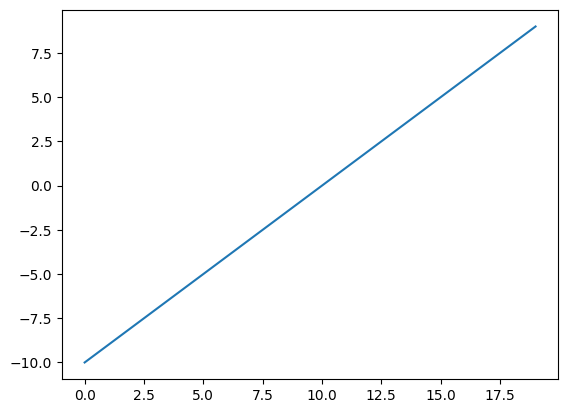

In [69]:
## Visualize data
plt.plot(A)
plt.show();

Relu using `torch.relu`

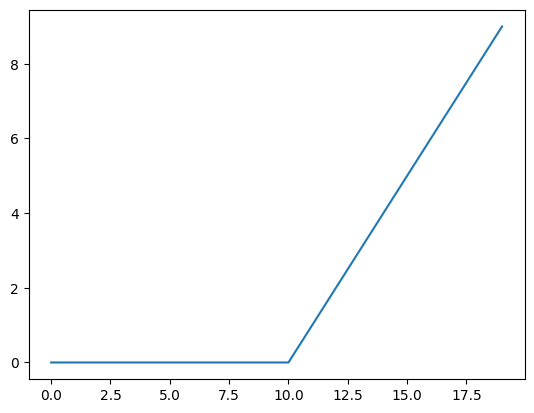

In [70]:
plt.plot(torch.relu(A))

In [71]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

Summary
* Recall that ReLU turns all negatives to 0 and keeps positive values as is.

Create a custom relu function

In [72]:
## function to reproduce relu function
def relu_func(x: torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x) #inputs must be tensors

relu_func(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

Plot custom relu function

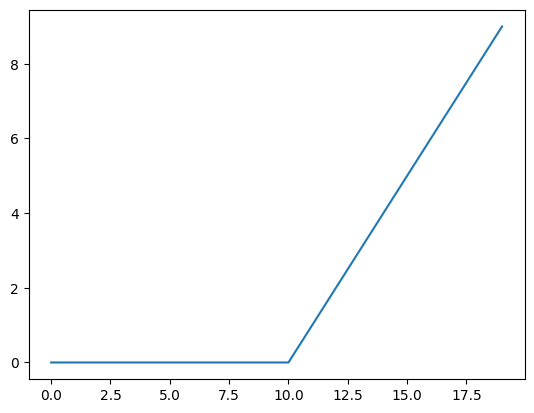

In [73]:
## plot our relu function
plt.plot(relu_func(A));

Sigmoid function with `torch.sigmoid`

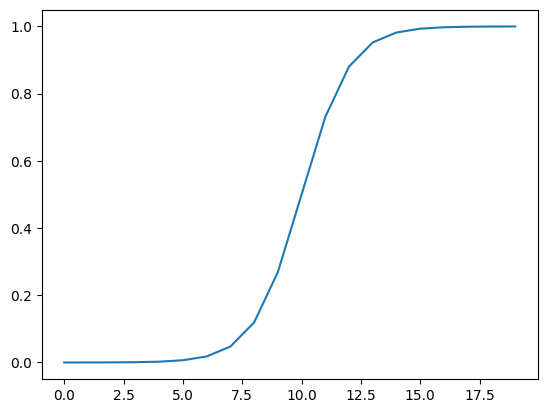

In [74]:
plt.plot(torch.sigmoid(A));

Create custom sigmoid function

In [75]:
## recreate sigmoid function https://alband.github.io/doc_view/generated/torch.sigmoid.html
def sigmoid_func(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))


Plot `torch.sigmoid` function

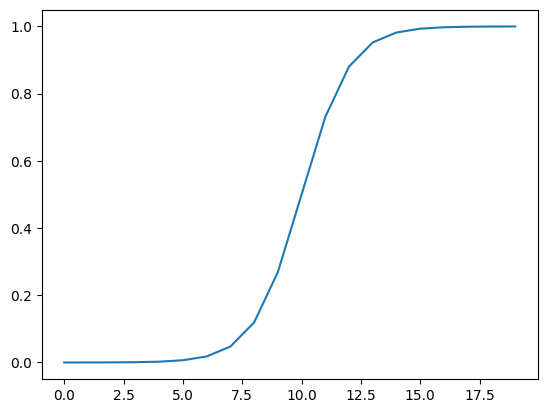

In [76]:
## plot original sigmoid
plt.plot(torch.sigmoid(A));

Plot custom sigmoid function

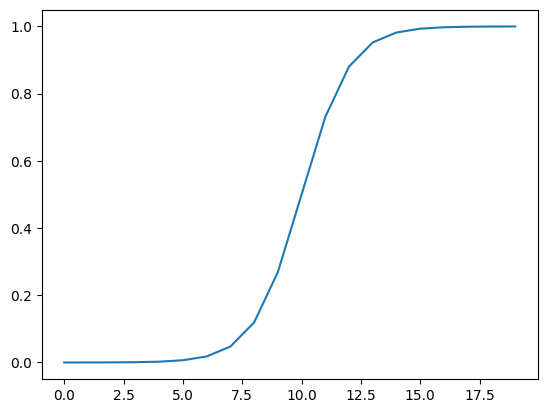

In [77]:
## plot this
plt.plot(sigmoid_func(A));

Tanh is another non-linear activation function

In [78]:
## what about tanh?
torch.tanh(A)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9999, -0.9993, -0.9951,
        -0.9640, -0.7616,  0.0000,  0.7616,  0.9640,  0.9951,  0.9993,  0.9999,
         1.0000,  1.0000,  1.0000,  1.0000])

Plot `torch.tanh`

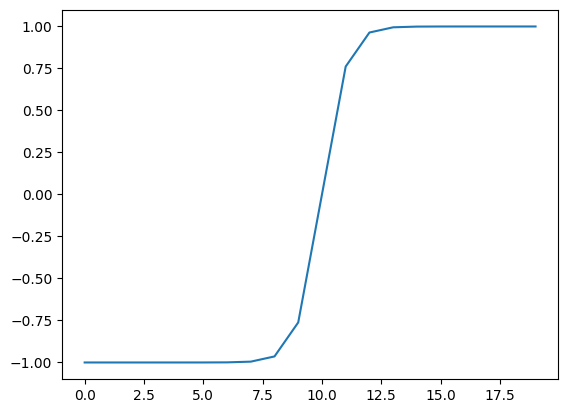

In [79]:
plt.plot(torch.tanh(A));

Create custom tanh function

In [80]:
## replicate tanh: tanh(x) = sinh(x) / cosh(x)
def tanh_func(x: torch.Tensor) -> torch.Tensor:
  return torch.sinh(x) / torch.cosh(x)

Plot custom tanh function

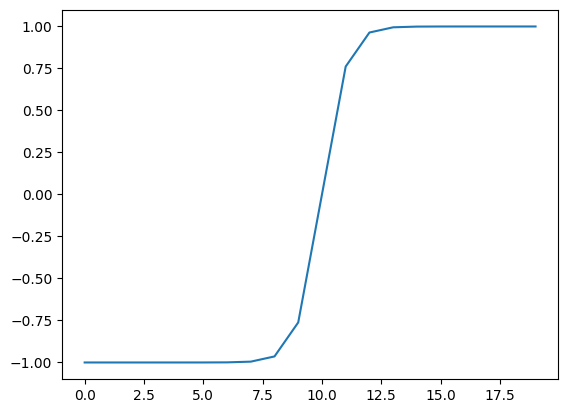

In [81]:
## plot
plt.plot(tanh_func(A));

## Multi-class classification problem - putting it all together
* Binary classification example:
  * cat vs. dogs
  * spam vs. not-spam

* Multiclass classification
  * cat vs. dog vs. chicken vs. horse

### Big Differences with Multiclass Classification?
* We use `Softmax` instead of `Sigmoid`
  * The difference is that the output logits or probabilities will be scaled between 0 and 1 for Softmax with each class pertaining to a certain range of the 0 to 1 whereas with Sigmoid it was binary either 0 or 1 only.
  * This is a great explanation of the difference: https://gombru.github.io/2018/05/23/cross_entropy_loss/
* We use `Cross Entropy` instead of `BCELoss`
* Most of it is similar to binary classification.

### Create a toy multi-class dataset

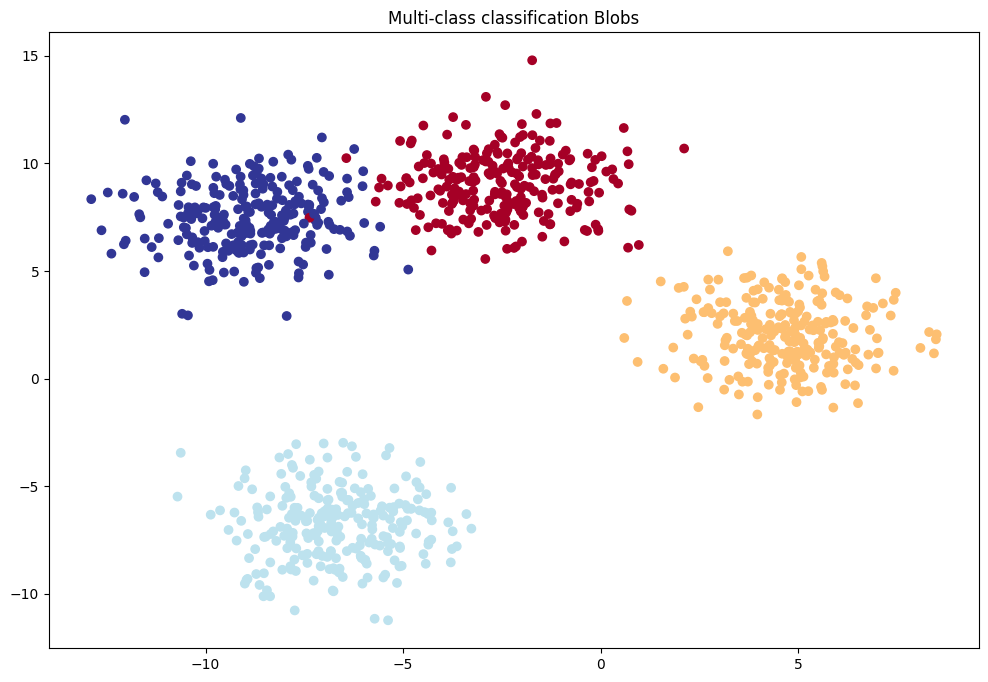

In [82]:
## import dependencies
import torch
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs ## sklearn built-in dataset
from sklearn.model_selection import train_test_split

# set hyperparameters for data creation
NUM_CLASSES = 4 ## multi-classes
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give clusters randomness
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors from numpy
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, #features
                                                                        y_blob, #lables
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(12,8))
plt.title("Multi-class classification Blobs")
plt.scatter(X_blob[:,0],
            X_blob[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu);

### Build Multi-class classification model in PyTorch
* **Question:** does the dataset above need linear or non-linearity for classification?
* There are 4 classes --> 4 output features to predict.
* Cross Entropy --> multi-class classification
* Activation function Softmax instead of Sigmoid.

In [83]:
## create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [84]:
# Build multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
      input_features (int): Number of input features to the model
      output_features (int): Number of output features (num of output classes)
      hidden_units (int): Number of hidden units between layers, default is 8.

    Returns:

    Raises:

    Example use:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        ## 3 layers
        ## layer 1
        nn.Linear(in_features=input_features, out_features=hidden_units),
        ## add non-linear layer
        nn.ReLU(),
        ## layer 2
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        ## add non-linear layer
        nn.ReLU(),
        ## layer 3
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  # Forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)

# create instance of blob model and send to target device
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [85]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [86]:
torch.unique(y_blob_train) ## 4 classes

tensor([0, 1, 2, 3])

### Create loss function & optimizer for multiclass classification model

* CrossEntropyLoss documentation: https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
  * If you wanted to train a datset with imbalanced targets, you would use the `weight` function:
```
weight (Tensor, optional) – a manual rescaling weight given to each class. If given, has to be a Tensor of size C and floating point dtype
```

In [87]:
## Create loss function for multi-class classification
loss_fn = nn.CrossEntropyLoss()

## Create optimizer for multi-class classification -- updates model params to reduce loss
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate -> hyperparameter you can change

### Getting prediction probabilities for a multi-class PyTorch model
* in order to eval, train and test model we need to convert the model outputs which are logits to pred probs to pred labels
```
raw logits --> prediction probabilities --> prediction labels
```

In [88]:
## lets get some raw outputs from the model (logits)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [89]:
## convert model logit outputs to pred probs
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


Summary
* Above we have:
1. raw logits
2. logits passed through `softmax` activation function which is why they are all positive.

In [90]:
## sum pred probs
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [91]:
## argmax gives us the exact index of the max probability
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

Summary
* The max prediction probability for 0 index is 0.3244 at index 1 which is the label 1 which is our prediction.

In [92]:
torch.argmax(y_pred_probs[1])

tensor(0, device='cuda:0')

Summary
* we can see for 1 index the prediction is 0 as the argmax for the 2nd row is 0.3336. Now these are just raw probabilities but you get the idea.

In [93]:
## now lets convert the model's pred probs --> pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [94]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

Summary
* Now we have the y_preds labels in the same format as the y_blob_test set which is our end goal.
* So we see that we went from:

```
1. Raw logits -->
2. prediction probs --> (torch.softmax)
3. prediction labels (torch.argmax) of prediction probabilities gives the label
```

### Create Train and Test Loops for multi-class PyTorch Classification Model

In [95]:
y_blob_train.dtype
y_logits.dtype

torch.float32

In [96]:
# Fit multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## set number of epochs
epochs=100

## Put data on target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

# Train loop
for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train) ## logits --> pred probs
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) ## can also take argmax of logits instead of torch.softmax

  # 2. Calculate loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad (zero out gradients)
  optimizer.zero_grad()

  # 4. loss backward (backpropagation)
  loss.backward()

  # 5. optimizer step
  optimizer.step()


  # Test Loop
  model_4.eval()
  with torch.inference_mode():
    ## 1. Forward pass
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1) #index of max value

    #print(test_logits.shape, y_blob_test.shape)
    ## 2. Calculate loss
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

  ## 3. Print out whats happenin'
  if epoch % 10 ==0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.4f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:2f}%")


Epoch: 0 | Loss: 1.1588 | Acc: 40.3750% | Test loss: 1.0755 | Test acc: 48.000000%
Epoch: 10 | Loss: 0.6448 | Acc: 96.7500% | Test loss: 0.6607 | Test acc: 97.500000%
Epoch: 20 | Loss: 0.4254 | Acc: 98.5000% | Test loss: 0.4307 | Test acc: 100.000000%
Epoch: 30 | Loss: 0.2529 | Acc: 99.1250% | Test loss: 0.2451 | Test acc: 99.500000%
Epoch: 40 | Loss: 0.1123 | Acc: 99.2500% | Test loss: 0.1023 | Test acc: 99.500000%
Epoch: 50 | Loss: 0.0663 | Acc: 99.2500% | Test loss: 0.0585 | Test acc: 99.500000%
Epoch: 60 | Loss: 0.0507 | Acc: 99.2500% | Test loss: 0.0429 | Test acc: 99.500000%
Epoch: 70 | Loss: 0.0430 | Acc: 99.2500% | Test loss: 0.0349 | Test acc: 99.500000%
Epoch: 80 | Loss: 0.0384 | Acc: 99.2500% | Test loss: 0.0299 | Test acc: 99.500000%
Epoch: 90 | Loss: 0.0352 | Acc: 99.2500% | Test loss: 0.0266 | Test acc: 99.500000%


### Making and evaluating predictions with a PyTorch multi-class model

In [97]:
## make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [98]:
# Go from logits --> Pred probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [99]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [100]:
## Go from pred probs --> pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

Summary
* `torch.argmax()` gives us the labels.

### Visualization

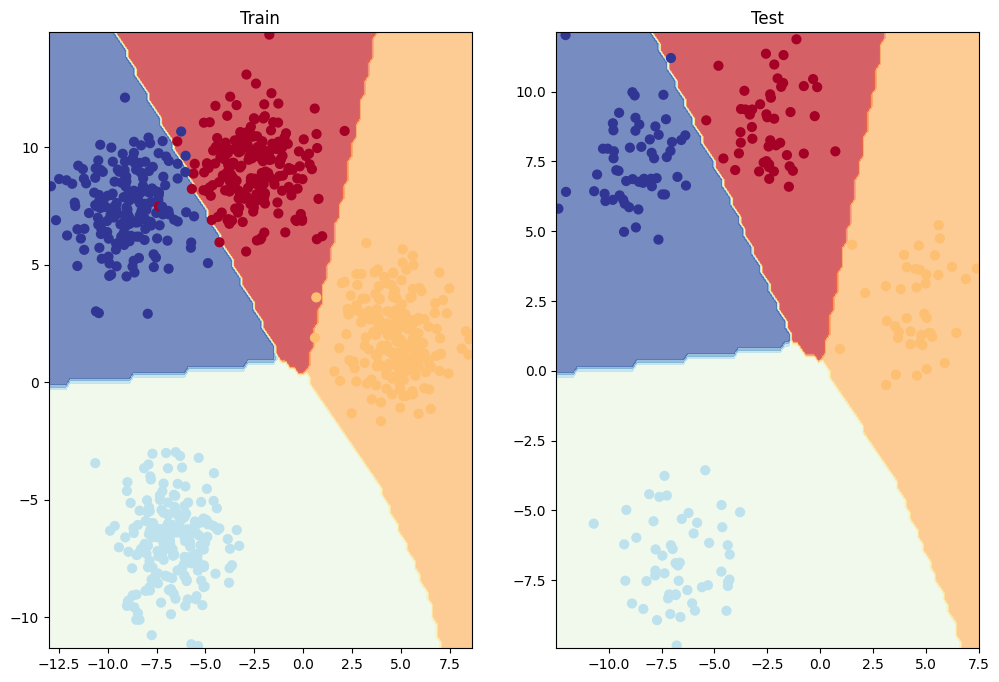

In [101]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

Summary
* This dataset was run both with and without a `.Relu()` non-linear activation function. In this case the data allowed us to use both linear and non-linear neural network layers to perform multi-class classification.
* In the real world though this may not always be the case.

### A few more Classification Metrics....(to evaluate our classification model)

1. **Accuracy**
  * Out of 100 samples, how many does the model get right?
  * **Best used with BALANCED target classes**
2. **Precision**
  * Best used with imbalanced classes.
3. **Recall**
  * Best used with imbalanced classes.
4. **F1-score**
  * Harmonic mean of Precision and Recall.
5. Confusion Matrix
6. Classification Matrix

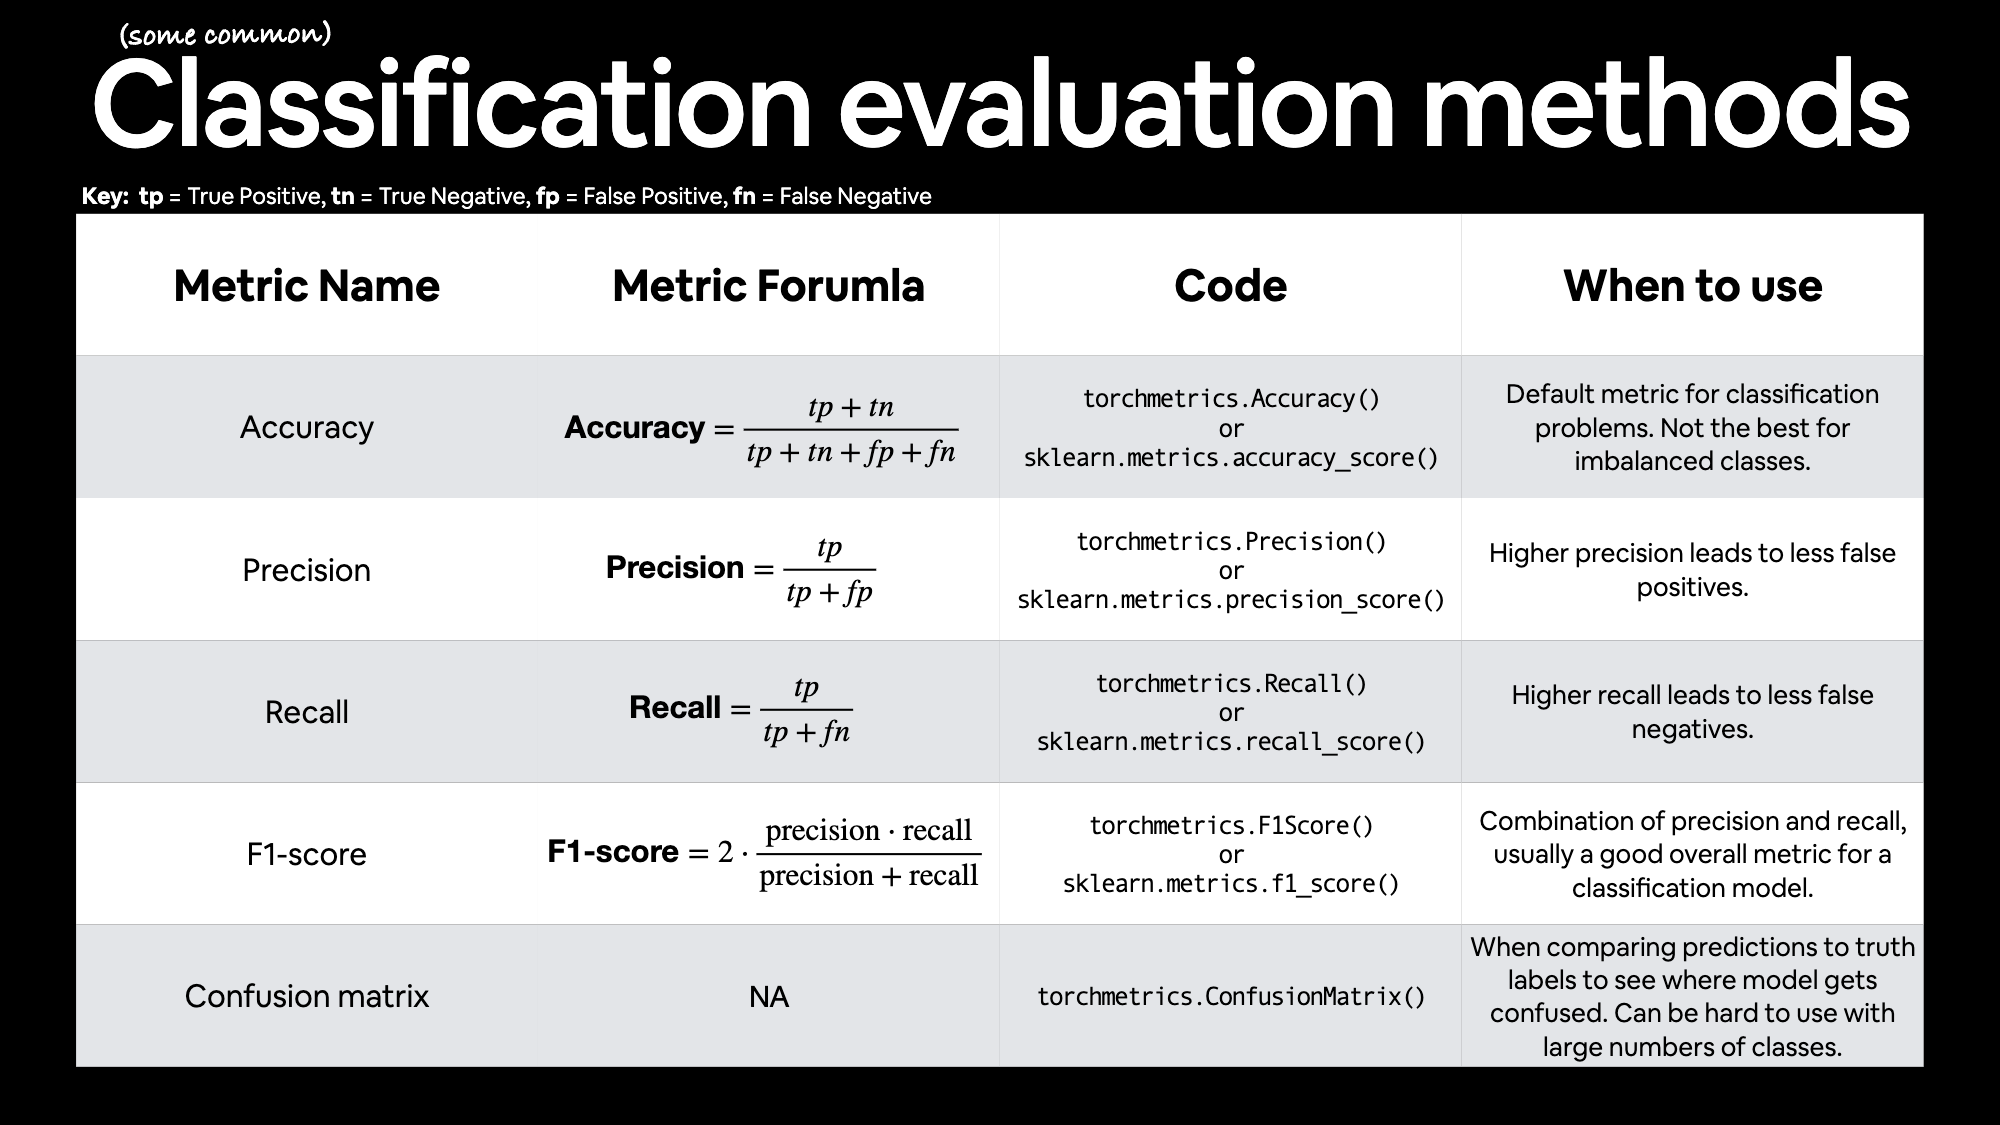

Summary
* Chart above is courtesy of Daniel Bourke's PyTorch for Deep Learning Bootcamp.
* If you want access to a lot of PyTorch metrics see Torchmetrics: https://lightning.ai/docs/torchmetrics/stable/

In [102]:
%%capture
!pip install torchmetrics

## Accuracy

In [114]:
from torchmetrics import Accuracy
import torch

## set num of classes
num_classes=4

# Setup metric
# Assuming 'cuda' is your desired device, change if necessary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
y_blob_test = y_blob_test.to(device) # Move y_blob_test to the device
torchmetric_accuracy = Accuracy(task="multiclass",
                                num_classes=num_classes).to(device)

# Calculate accuracy
torchmetric_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

## Precision, Recall, F1 Score

In [113]:
import torch
from torchmetrics import Precision, Recall, F1Score

## num classes
num_classes=4


# Setup metric
# Assuming 'cuda' is your desired device, change if necessary
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
y_blob_test = y_blob_test.to(device) # Move y_blob_test to the device



## 1. Precision
torchmetric_precision = Precision(task="multiclass",
                                  num_classes=num_classes).to(device)

## 2. Recall
torchmetric_recall = Recall(task="multiclass",
                            num_classes=num_classes).to(device)

## 3. F1 score
torchmetric_f1score = F1Score(task="multiclass",
                              num_classes=num_classes).to(device)

## calculate metrics
precision_score = torchmetric_precision(y_preds, y_blob_test)
recall_score = torchmetric_recall(y_preds, y_blob_test)
f1_score = torchmetric_f1score(y_preds, y_blob_test)

## print each
print(f"Precision score: {precision_score:.3f}%")
print(f"Recall score: {recall_score:.3f}%")
print(f"F1 Score: {f1_score:.3f}%")

Precision score: 0.995%
Recall score: 0.995%
F1 Score: 0.995%


## AUROC

In [108]:
from torch import tensor
from torchmetrics.classification import MulticlassAUROC


## Setup AUROC metric
torchmetric_AUROC = MulticlassAUROC(num_classes=4, average="macro", thresholds=None).to(device)

## Calculate AUROC
torchmetric_AUROC(y_pred_probs, y_blob_test)


tensor(1., device='cuda:0')

Summary
* Of course these metrics are all near perfect because of the dataset we are using and the low loss result of our model, it was highly accurate and probably overfit the data as well.